# Compare predictions of other female locomotion variables

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from disp import set_plot


STRAIN_KEY = '_'.join(['NM91', 'ZH23']).lower()
REG_KEY = 'ridge_alpha_10'


PFX_BHV = f'data/simple/behav_xtd/behav_xtd'

MASKED = True

In [2]:
NNRN = 224
NRL_MDLS = [
    'linma',  # linear neural model w MA-derived filters
    # 'lnma',  # lin-nonlin neural model w MA-derived filters
    'lnma_tweaked',  # lin-nonlin neural model w double-exp filter optimized from MA fit
    'ma',  # mult-adapt neural model
    
#     'lnr',  # linear-nonlinear model (fit w ridge regr)
#     'lnr_relu',  
#     'lnr_relu_flex',
    
    
#     'linr',  # linear neural model (fit w ridge regr)
    
#     'ma_ind_ta',
    
#     'lin',  # linear neural model
#     'ln',  # linear-nonlinear model
]

LABELS = {
    'ma': 'MA',
    # 'lnma': 'LN',
#     'lnr': 'LN-R',
#     'lnr_relu_flex': 'LN_FLEX',
    'lnma_tweaked': 'LN',
    
    'linma': 'Lin',
    
#     'ma_ind_ta': 'MA_IND_TA',
    
    'MTN': 'Motion',
}

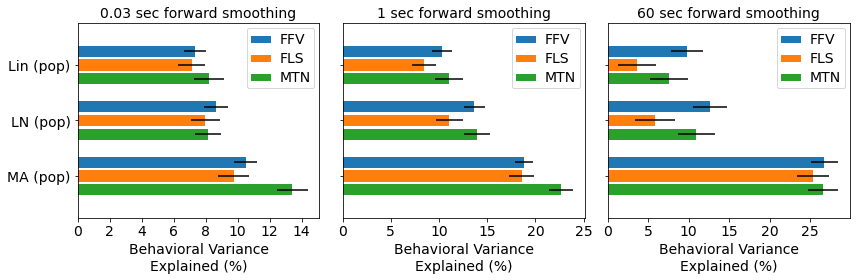

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
TARG_BHVS = ['FFV', 'FLS', 'MTN']
TWDWS = [.03, 1, 60]

for ctarg, TARG_BHV in enumerate(TARG_BHVS):
    TARGS = [f'{TARG_BHV}_MN_{twdw}' for twdw in TWDWS]

    if not MASKED:
        # ppln fits
        ppln_rslts = [
            np.load(f'data/simple/mlv/neur_basic/baker_{nrl_mdl}_{STRAIN_KEY}_{TARG_BHV.lower()}_{REG_KEY}.npy', allow_pickle=True)[0]
            for nrl_mdl in NRL_MDLS
        ]
    else:
        # ppln fits
        ppln_rslts = [
            np.load(f'data/simple/mlv/neur_basic/baker_{nrl_mdl}_{STRAIN_KEY}_{TARG_BHV.lower()}_{REG_KEY}_masked.npy', allow_pickle=True)[0]
            for nrl_mdl in NRL_MDLS
        ]

    for ax, twdw in zip(axs, TWDWS):
        labels = []
        r2_mns = []
        r2_sems = []

        targ = f'{TARG_BHV}_MN_{twdw}'

        # ppln results
        for nrl_mdl, ppln_rslt in zip(NRL_MDLS, ppln_rslts):
            labels.append(f'{LABELS[nrl_mdl]} (pop)')
            r2_mns.append(ppln_rslt['r2_test'][targ].mean())
            r2_sems.append(ppln_rslt['r2_test'][targ].std() / np.sqrt(ppln_rslt['nsplit']))

        r2_mns = np.array(r2_mns)
        r2_sems = np.array(r2_sems)

        ax.barh(np.arange(len(r2_mns))+.25*ctarg, 100*r2_mns, xerr=100*r2_sems, height=.2)
        # ax.set_xlim(left=0)

for ax, twdw in zip(axs, TWDWS):
    ax.set_ylim([3, -.5])
    ax.set_yticks([0.25, 1.25, 2.25])
    ax.legend(TARG_BHVS)
    if ax is axs[0]:
        ax.set_yticklabels(labels)
    else:
        ax.set_yticklabels([])

    set_plot(ax, x_label='Behavioral Variance\nExplained (%)', title=f'{twdw} sec forward smoothing', font_size=14)
    
fig.savefig('supp/8_mtn_vs_fls_vs_ffv.svg')